## Uso de Decision Trees para mostrar explicação de decisões via regras derivadas dos ramos da DT.

In [5]:
# usando o nosso dataset cv.csv
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
file_name = 'data.csv'
data = pd.read_csv(file_name)
data["Label"] = data["Program"] + " " + data["Language"] + " " + data['PowerLimit'].map(lambda x: str(x))
data.drop(["Program","Language",'PowerLimit'],axis=1,inplace=True)

y = data.Label
X = data.drop(columns=['Label'])
print(set(data['Label'].values))

{' Pyperformance_31 Python_3.11.4 -1', ' Pyperformance_5 Python_3.9.18 5', ' Pyperformance_5 Python_3.11.4 -1', ' Pyperformance_31 Python_3.6.13 5', ' Pyperformance_5 Python_3.6.13 5', ' Pyperformance_5 Python_3.6.13 -1', ' Pyperformance_31 Python_3.6.13 -1', ' Pyperformance_31 Python_3.9.18 -1', ' Pyperformance_5 Python_3.11.4 5', ' Pyperformance_5 Python_3.9.18 -1', ' Pyperformance_31 Python_3.9.18 5', ' Pyperformance_31 Python_3.11.4 5'}


[Text(0.4722222222222222, 0.9, 'Time <= 264.5\nentropy = 3.585\nsamples = 239\nvalue = [19, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20, 20]\nclass =  Pyperformance_5 Python_3.9.18 5'),
 Text(0.2222222222222222, 0.7, 'PCK <= 2.61\nentropy = 2.585\nsamples = 119\nvalue = [19, 0, 20, 0, 20, 0, 20, 0, 20, 0, 20, 0]\nclass =  Pyperformance_5 Python_3.11.4 -1'),
 Text(0.1111111111111111, 0.5, 'Memory <= 53.75\nentropy = 1.585\nsamples = 60\nvalue = [0, 0, 20, 0, 0, 0, 20, 0, 0, 0, 20, 0]\nclass =  Pyperformance_5 Python_3.11.4 -1'),
 Text(0.05555555555555555, 0.3, 'entropy = 0.995\nsamples = 37\nvalue = [0, 0, 0, 0, 0, 0, 20, 0, 0, 0, 17, 0]\nclass =  Pyperformance_31 Python_3.6.13 -1'),
 Text(0.16666666666666666, 0.3, 'entropy = 0.559\nsamples = 23\nvalue = [0, 0, 20, 0, 0, 0, 0, 0, 0, 0, 3, 0]\nclass =  Pyperformance_5 Python_3.11.4 -1'),
 Text(0.3333333333333333, 0.5, 'Memory <= 56.0\nentropy = 1.585\nsamples = 59\nvalue = [19, 0, 0, 0, 20, 0, 0, 0, 20, 0, 0, 0]\nclass =  Pyperformance_5 Pyth

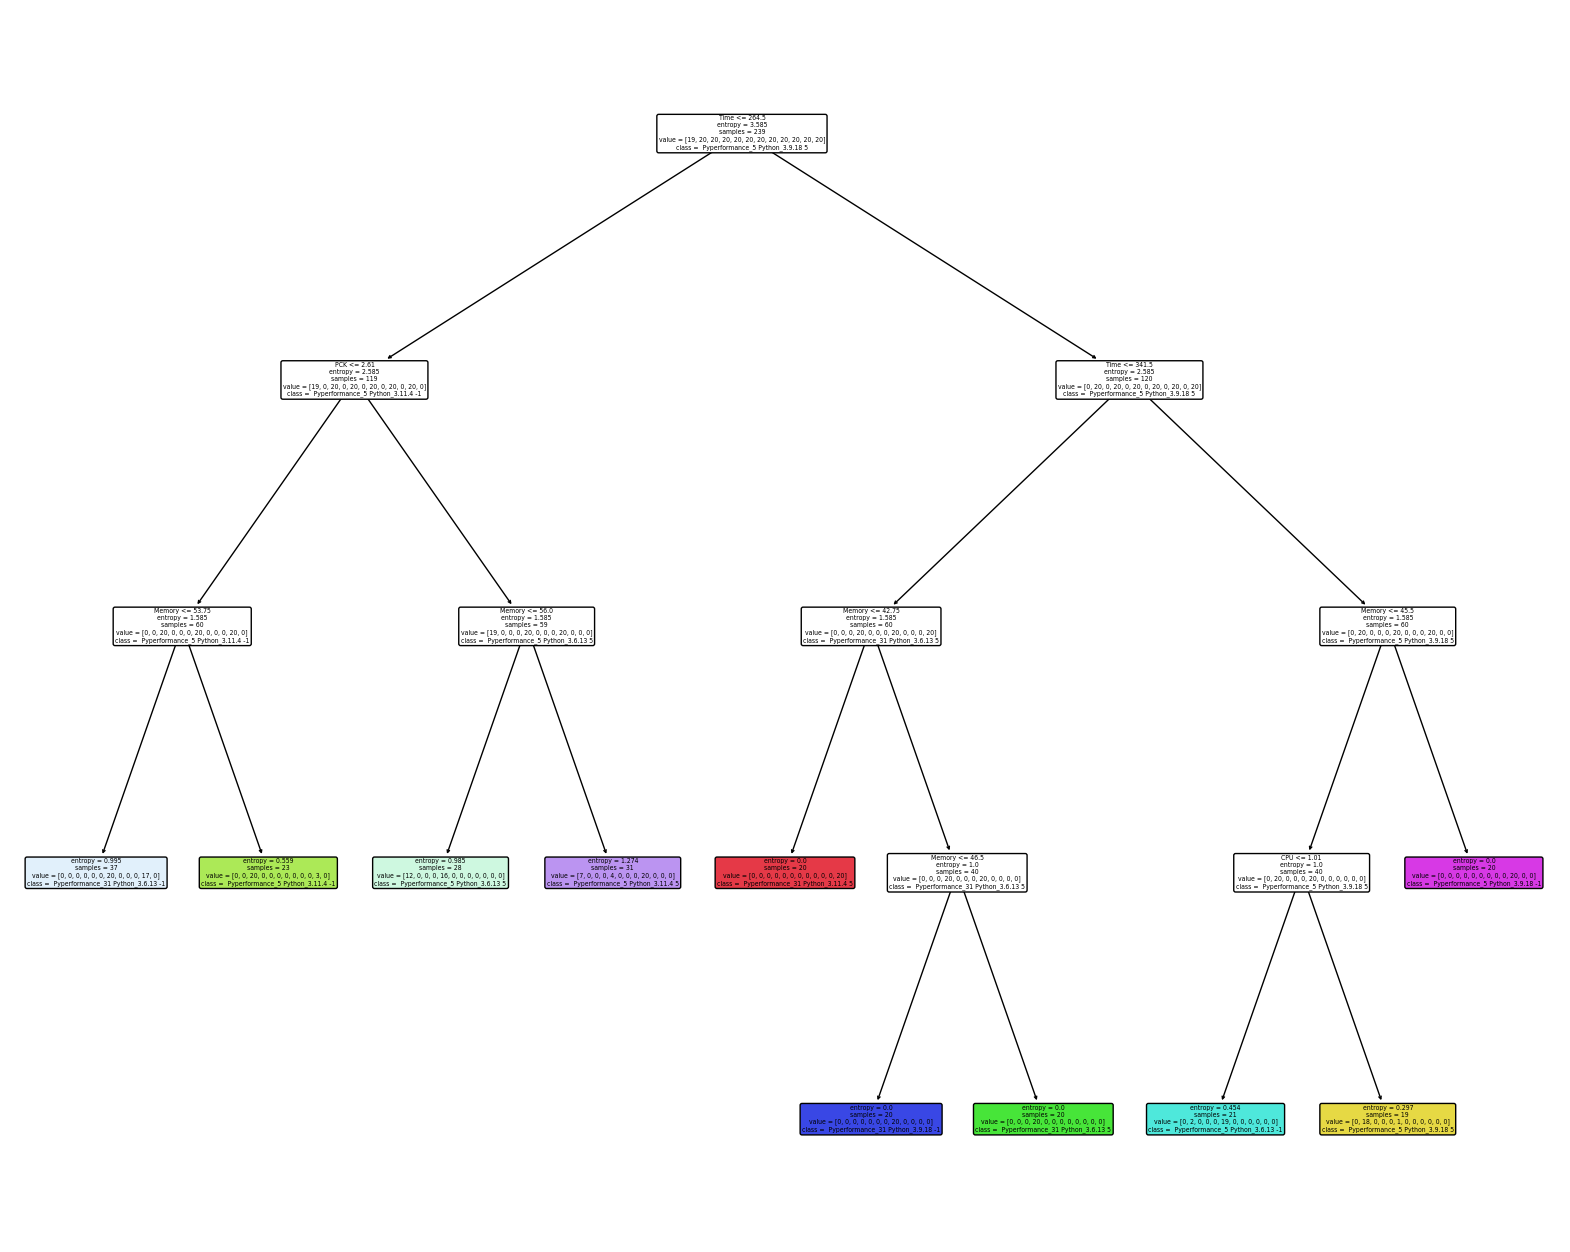

In [7]:
classes = [elem for elem in set(data['Label'].values)]
atribs = ['PCK','CPU','Time','Memory','Temperature']
%matplotlib inline
clf = tree.DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.1)
plt.figure(figsize=(20,16))
clf = clf.fit(X, y)
tree.plot_tree(clf,feature_names=atribs,class_names=classes,filled=True, rounded=True)